# Analysis of the average price for orders on artificial order books

This book serves as an addition to the previous work done on demonstrating the behaviour of Q-Learning and the influence of **time horizon** and **inventory** to the price which has to be paid over the course of filling **BUY** and **SELL** orders. See: **analysis_average_price.ipynb**.

However, in this notebook we study the behaviour of order execution with artificially created order books.
With that, we can not only follow the matching process of the orders more easily as we can estimate the expected outcome in advance, but also produce noise absent results.
In a second step, this technique will allow to verify whether an applied learning algorithm (as for example presented in: analysis_profit_vs_reward.ipynb) was able to extract the optimal execution strategy.

In [3]:
%cd ..

/Volumes/Data/dev/ctc-executioner


In [7]:
import numpy as np
import datetime
from action_space import ActionSpace
from qlearn import QLearn
from order_side import OrderSide
from orderbook import Orderbook
from action_state import ActionState
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
sns.set(color_codes=True)

We copy the Q-Learning *train* and *test* functions as well as the evaluation methods *calculate_profits* and *hist_profits* from **analysis_average_price.ipynb**.

In [5]:
def train(episodes=100):
    if not orderbook.getStates():
        orderbook.loadFromFile(trainBook)

    actionSpace.train(episodes=episodes, force_execution=False)
    np.save('q.npy', actionSpace.ai.q)
    return actionSpace.ai.q


def test(episodes=100, average=True):
    if not orderbook_test.getStates():
        orderbook_test.loadFromFile(testBook)

    q = np.load('q.npy').item()
    M = actionSpace_test.backtest(q, episodes, average=average)
    return M


def calculate_profits(epochs):
    profits = []
    for i in range(epochs):
        M = test(1, average=False)
        M = np.array(M)
        profits.append(np.sum(M[0:, 4]))
    return profits


def hist_profit(episodes):
    x = calculate_profits(episodes)
    sns.distplot(x)
    plt.show()

In [94]:
levels = list(range(-10, 11))

## Configuration

Given the blow specified configuration parameters, we are able to create an artificial order book.
With this, we are able to understand the underneath mechanics of the matching process which results in trades getting executed.

### Monotone decreasing

First off, we build an order book that contains bids and asks which are monotone decreasing over the course of 10 minutes with a state update of every 10 seconds. 

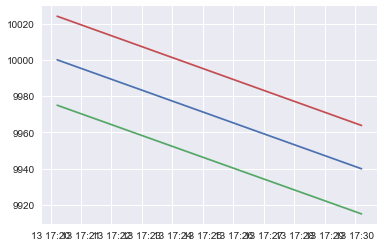

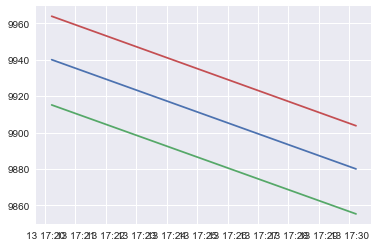

In [95]:
orderbook = Orderbook()
config = {
    'startPrice': 10000.0,
    'endPrice': 9940.0,
    'levels': 25,
    'qtyPosition': 0.1,
    'startTime': datetime.datetime.now(),
    'duration': datetime.timedelta(minutes=10),
    'interval': datetime.timedelta(seconds=10)
}
orderbook.createArtificial(config)
orderbook.plot(show_bidask=True)

config = {
    'startPrice': 9940.0,
    'endPrice': 9880.0,
    'levels': 25,
    'qtyPosition': 0.1,
    'startTime': datetime.datetime.now(),
    'duration': datetime.timedelta(minutes=10),
    'interval': datetime.timedelta(seconds=10)
}
orderbook_test = Orderbook()
orderbook_test.createArtificial(config)
orderbook_test.plot(show_bidask=True)

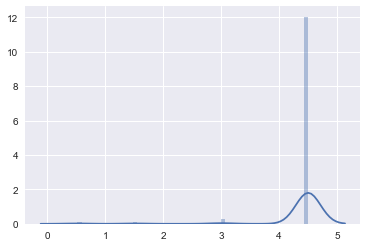

In [96]:
side = OrderSide.BUY
T = [0, 20, 40, 60, 80, 100]
T_test = [0, 20, 40, 60, 80, 100]
I = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
actionSpace = ActionSpace(orderbook=orderbook, side=side, T=T, I=I, levels=levels)
actionSpace_test = ActionSpace(orderbook=orderbook_test, side=side, T=T_test, I=I, levels=levels)

train(300)
hist_profit(100)

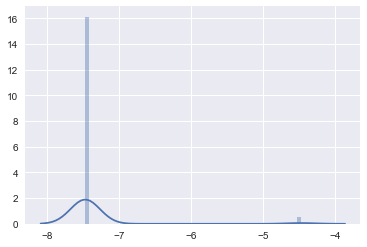

In [97]:
side = OrderSide.SELL
T = [0, 20, 40, 60, 80, 100]
T_test = [0, 20, 40, 60, 80, 100]
I = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
actionSpace = ActionSpace(orderbook=orderbook, side=side, T=T, I=I, levels=levels)
actionSpace_test = ActionSpace(orderbook=orderbook_test, side=side, T=T_test, I=I, levels=levels)

train(300)
hist_profit(100)

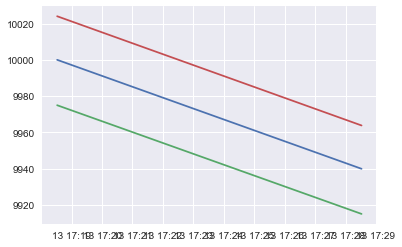

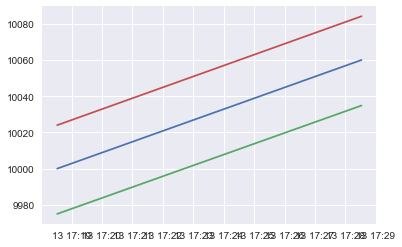

In [92]:
orderbook = Orderbook()
config = {
    'startPrice': 10000.0,
    'endPrice': 9940.0,
    'levels': 25,
    'qtyPosition': 0.1,
    'startTime': datetime.datetime.now(),
    'duration': datetime.timedelta(minutes=10),
    'interval': datetime.timedelta(seconds=10)
}
orderbook.createArtificial(config)
orderbook.plot(show_bidask=True)

config = {
    'startPrice': 10000.0,
    'endPrice': 10060.0,
    'levels': 25,
    'qtyPosition': 0.1,
    'startTime': datetime.datetime.now(),
    'duration': datetime.timedelta(minutes=10),
    'interval': datetime.timedelta(seconds=10)
}
orderbook_test = Orderbook()
orderbook_test.createArtificial(config)
orderbook_test.plot(show_bidask=True)

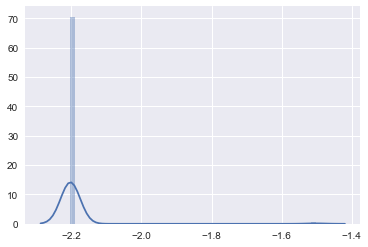

In [93]:
side = OrderSide.BUY
T = [0, 20, 40, 60, 80, 100]
T_test = [0, 20, 40, 60, 80, 100]
I = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
actionSpace = ActionSpace(orderbook=orderbook, side=side, T=T, I=I, levels=levels)
actionSpace_test = ActionSpace(orderbook=orderbook_test, side=side, T=T_test, I=I, levels=levels)

train(300)
hist_profit(100)

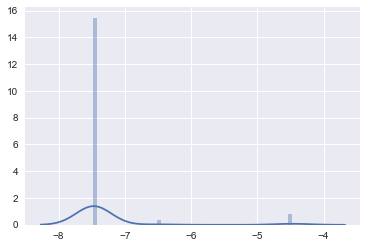

In [98]:
side = OrderSide.SELL
T = [0, 20, 40, 60, 80, 100]
T_test = [0, 20, 40, 60, 80, 100]
I = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
actionSpace = ActionSpace(orderbook=orderbook, side=side, T=T, I=I, levels=levels)
actionSpace_test = ActionSpace(orderbook=orderbook_test, side=side, T=T_test, I=I, levels=levels)

train(300)
hist_profit(100)

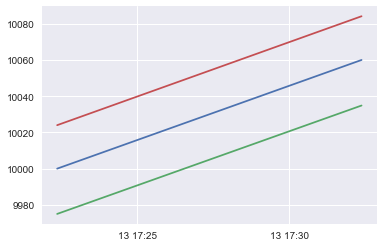

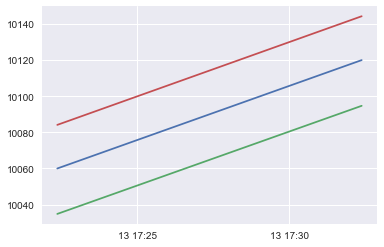

In [99]:
orderbook = Orderbook()
config = {
    'startPrice': 10000.0,
    'endPrice': 10060.0,
    'levels': 25,
    'qtyPosition': 0.1,
    'startTime': datetime.datetime.now(),
    'duration': datetime.timedelta(minutes=10),
    'interval': datetime.timedelta(seconds=10)
}
orderbook.createArtificial(config)
orderbook.plot(show_bidask=True)

config = {
    'startPrice': 10060.0,
    'endPrice': 10120.0,
    'levels': 25,
    'qtyPosition': 0.1,
    'startTime': datetime.datetime.now(),
    'duration': datetime.timedelta(minutes=10),
    'interval': datetime.timedelta(seconds=10)
}
orderbook_test = Orderbook()
orderbook_test.createArtificial(config)
orderbook_test.plot(show_bidask=True)

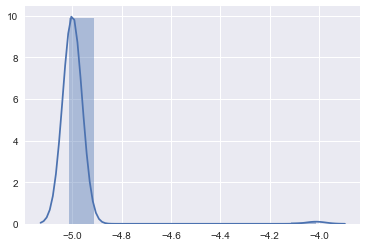

In [100]:
side = OrderSide.BUY
T = [0, 20, 40, 60, 80, 100]
T_test = [0, 20, 40, 60, 80, 100]
I = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
actionSpace = ActionSpace(orderbook=orderbook, side=side, T=T, I=I, levels=levels)
actionSpace_test = ActionSpace(orderbook=orderbook_test, side=side, T=T_test, I=I, levels=levels)

train(300)
hist_profit(100)

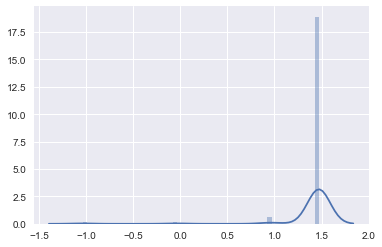

In [101]:
side = OrderSide.SELL
T = [0, 20, 40, 60, 80, 100]
T_test = [0, 20, 40, 60, 80, 100]
I = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
actionSpace = ActionSpace(orderbook=orderbook, side=side, T=T, I=I, levels=levels)
actionSpace_test = ActionSpace(orderbook=orderbook_test, side=side, T=T_test, I=I, levels=levels)

train(300)
hist_profit(100)